In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import SparseCategoricalAccuracy, Mean

In [16]:
sample_size = 300
x_train = tf.random.normal(shape = (sample_size, 1), dtype = tf.float32)
x_train_noise = x_train + 0.2*tf.random.normal(shape = (sample_size, 1))
y_train = tf.cast((x_train_noise > 0), dtype = tf.int32)

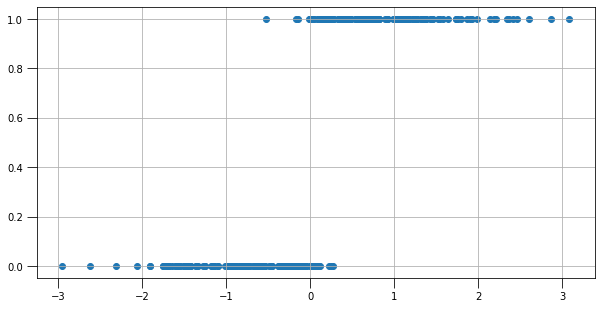

In [17]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(x_train, y_train)
ax.tick_params(size = 10)
ax.grid()

In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(sample_size).batch(6)

In [24]:
model = Sequential()
model.add(Dense(units = 2, activation = 'softmax'))

In [25]:
loss_object = SparseCategoricalCrossentropy()
optimizer = SGD(learning_rate = 1)

train_loss = Mean()
train_acc = SparseCategoricalAccuracy()

EPOCHS = 10

In [27]:
for epoch in range(EPOCHS):
    for x, y in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y, predictions)
            
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        train_loss(loss)
        train_acc(y, predictions)
        
    print('Epoch:', epoch, 'Train loss: {:.4f}\t Train accuracy: {:.2f}%\n'.format(train_loss.result(), train_acc.result()*100))
    
    train_loss.reset_states()
    train_acc.reset_states()

Epoch: 0 Train loss: 0.2163	 Train accuracy: 93.67%

Epoch: 1 Train loss: 0.1590	 Train accuracy: 94.33%

Epoch: 2 Train loss: 0.1480	 Train accuracy: 95.00%

Epoch: 3 Train loss: 0.1497	 Train accuracy: 93.00%

Epoch: 4 Train loss: 0.1460	 Train accuracy: 94.00%

Epoch: 5 Train loss: 0.1426	 Train accuracy: 94.00%

Epoch: 6 Train loss: 0.1403	 Train accuracy: 94.67%

Epoch: 7 Train loss: 0.1435	 Train accuracy: 94.33%

Epoch: 8 Train loss: 0.1451	 Train accuracy: 93.33%

Epoch: 9 Train loss: 0.1419	 Train accuracy: 93.67%



In [28]:
t1 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t1:
    train_loss(t)
    print(train_loss.result())
    
print('\n')

t1 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t1:
    train_loss(t)
    print(train_loss.result())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


tf.Tensor(3.142857, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.1, shape=(), dtype=float32)
tf.Tensor(3.2727273, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


In [31]:
train_loss.reset_states()
t1 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t1:
    train_loss(t)
    print(train_loss.result())
    
print('\n')
train_loss.reset_states() # reset loss and calculate independently for each epoch

t1 = tf.constant([1, 2, 3, 4, 5, 6])
for t in t1:
    train_loss(t)
    print(train_loss.result())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(1.5, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.5, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(3.5, shape=(), dtype=float32)


In [ ]:
()